<a href="https://colab.research.google.com/github/paultgriffiths/boxmox-in-the-cloud/blob/main/run_boxmox_inside_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install bison flex yacc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'byacc' instead of 'yacc'
The following additional packages will be installed:
  libfl-dev libfl2
Suggested packages:
  bison-doc flex-doc
The following NEW packages will be installed:
  bison byacc flex libfl-dev libfl2
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,158 kB of archives.
After this operation, 3,884 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 flex amd64 2.6.4-8build2 [307 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 bison amd64 2:3.8.2+dfsg-1build1 [748 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfl2 amd64 2.6.4-8build2 [10.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfl-dev amd64 2.6.4-8build2 [6,236 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 byacc amd64 1:2.0.20220114-1 [86.2 kB]
Fetched 1,158 kB in 1s

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls
!pwd

drive  sample_data
/content


In [4]:
## required modules
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
## suppress output
#%%capture

## flag to check if need to install KPP
install_BOXMOX  = True

## install modules necessary for running BOXMOX and KPP
!apt-get install flex bison

## now install BOXMOX
if install_BOXMOX:
    !cp /content/drive/MyDrive/Colab/Seb-OH/boxmox-1.8.tar.gz ./
    !tar zxf boxmox-1.8.tar.gz
    # install BOXMOX via command-line
    %cd boxmox-1.8
    !././configure --prefix=/content/
    !make
    !make install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bison is already the newest version (2:3.8.2+dfsg-1build1).
flex is already the newest version (2.6.4-8build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
/conten

In [6]:
%pwd

'/content/boxmox-1.8'

In [7]:
# modify environment variables, NB can't use BASH export, need to use  os module
# see https://stackoverflow.com/questions/49684495/is-it-possible-to-set-environment-variables-in-googles-colaboratory
os.environ['KPP_HOME'] = "/content/share/boxmox/"
os.environ['PATH'] += ":/content/bin/"

# sanity check
!which kpp

/content/bin//kpp


In [8]:
## set up KPP for use with MOZART_T1 mechanism
%cd /content/bin/
!/content/bin/prepare_BOXMOX_mechanism MOZART_4

/content/bin
All necessary files and programs found.
Running KPP.
'Make'ing the model.
Successfully created MOZART_4.exe.


In [9]:
#＃ set up new MOZART_T1 PBL experiment
%cd /content/bin/
!/content/bin/new_BOXMOX_experiment_from_example pbl_diurnal_cycle

/content/bin


In [10]:
## run the first experiment with defaults
%%capture
%cd /content/bin/pbl_diurnal_cycle
!./MOZART_4.exe

In [11]:
concs = pd.read_csv('./MOZART_4.conc', header=0, delim_whitespace=True, index_col=0)
ems = pd.read_csv('Emissions.csv', skiprows=3, delim_whitespace=True)
rep_ems = pd.concat([ems.iloc[0:24,:]]*4, ignore_index=True)
jrates = pd.read_csv('PhotolysisRates.csv', skiprows=3, delim_whitespace=True)
rep_jrates = pd.concat([jrates.iloc[0:24,:]]*4, ignore_index=True)

<ipython-input-11-ed65a699da87>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  concs = pd.read_csv('./MOZART_4.conc', header=0, delim_whitespace=True, index_col=0)
<ipython-input-11-ed65a699da87>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ems = pd.read_csv('Emissions.csv', skiprows=3, delim_whitespace=True)
<ipython-input-11-ed65a699da87>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  jrates = pd.read_csv('PhotolysisRates.csv', skiprows=3, delim_whitespace=True)


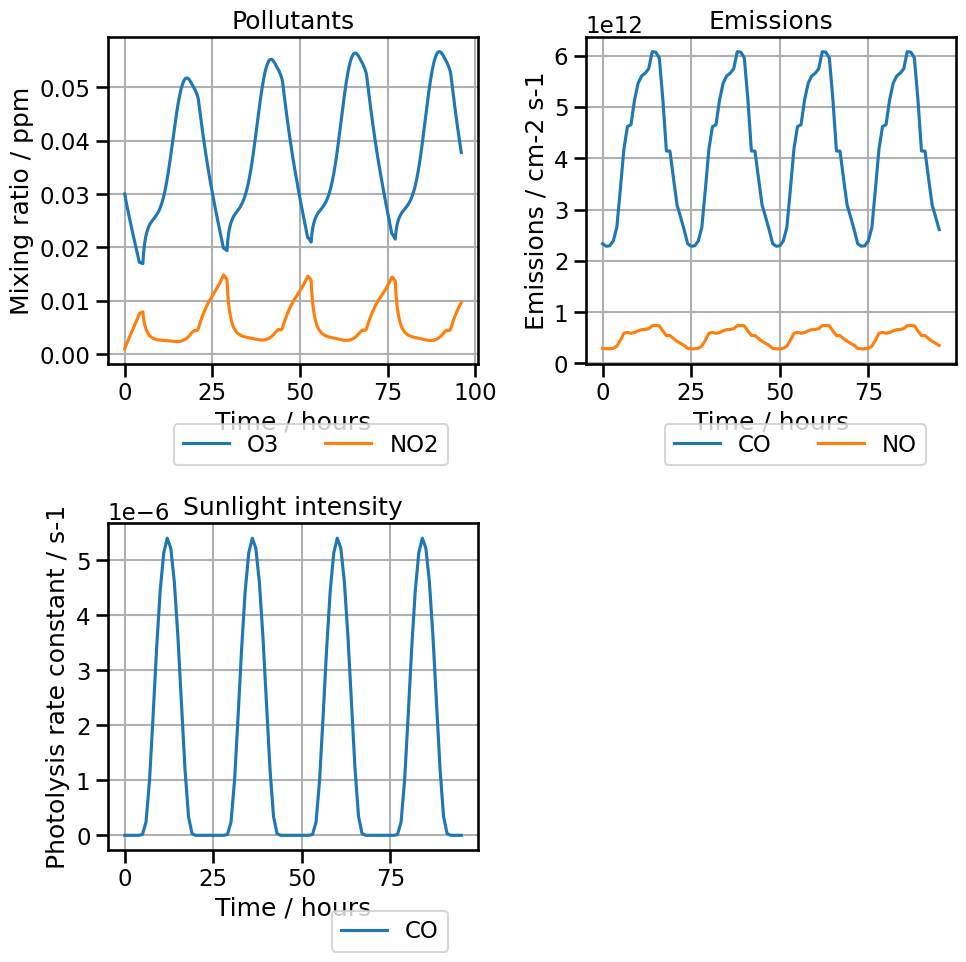

In [12]:
sns.set_context("talk")
fig=plt.figure()
fig = plt.gcf()
fig.set_size_inches(10, 10)



ax = fig.add_subplot(2,2,1)
sns.lineplot( concs['O3'], ax=ax, label='O3')
sns.lineplot( concs['NO2'], ax=ax, label='NO2')
## could go fancier with additional diagnostics
# sns.lineplot( (results['NO2'] + results['O3']), label = 'Oxidant', ax=ax)#.plot(ax=ax, grid=True)
# sns.lineplot( (results['NO2'] + results['O3'] + results['HNO3']), label = 'Oy', ax=ax)#.plot(ax=ax, grid=True)

ax.set(xlabel='Time / hours', ylabel='Mixing ratio / ppm')
plt.grid(True)
plt.legend(ncols=4,bbox_to_anchor=(0.95, -0.15))
plt.title("Pollutants")

ax = fig.add_subplot(2,2,2)
sns.lineplot( rep_ems['CO'], ax=ax, label='CO')
sns.lineplot( rep_ems['NO'], ax=ax, label='NO')
#sns.lineplot( results['NO2'], ax=ax, label='NO2')
## could go fancier with additional diagnostics
# sns.lineplot( (results['NO2'] + results['O3']), label = 'Oxidant', ax=ax)#.plot(ax=ax, grid=True)
# sns.lineplot( (results['NO2'] + results['O3'] + results['HNO3']), label = 'Oy', ax=ax)#.plot(ax=ax, grid=True)

ax.set(xlabel='Time / hours', ylabel='Emissions / cm-2 s-1')
plt.grid(True)
plt.title("Emissions")
plt.legend(ncols=4,bbox_to_anchor=(0.95, -0.15))


ax = fig.add_subplot(2,2,3)
sns.lineplot( rep_jrates['ch3cho'], ax=ax, label='CO')
#sns.lineplot( rep_ems['NO'], ax=ax, label='NO')
#sns.lineplot( results['NO2'], ax=ax, label='NO2')
## could go fancier with additional diagnostics
# sns.lineplot( (results['NO2'] + results['O3']), label = 'Oxidant', ax=ax)#.plot(ax=ax, grid=True)
# sns.lineplot( (results['NO2'] + results['O3'] + results['HNO3']), label = 'Oy', ax=ax)#.plot(ax=ax, grid=True)

ax.set(xlabel='Time / hours', ylabel='Photolysis rate constant / s-1')
plt.grid(True)
plt.title("Sunlight intensity")
plt.legend(ncols=4,bbox_to_anchor=(0.95, -0.15))

plt.tight_layout()

In [ ]:
## optional - plot as function date, rather than hours
# import datetime as dt
# import matplotlib.dates as mdates
# results['time_in_minutes']=results['time']*60
# results['new_time'] = dt.datetime(2010,1,1) + pd.TimedeltaIndex(results['time_in_minutes'], unit='m')
# ... do plotting
# myFmt = mdates.DateFormatter('%d-%H')
# ax.xaxis.set_major_formatter(myFmt)
